### Part 2

Load in your data set.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline


food1 = pd.read_csv('food_coded.csv')


Separate your target column from potential feature columns.


In [2]:
target_col = food1.loc[:, 'diet_current_coded']
feature_cols = food1.loc[:, ['exercise', 'weight', 'ideal_diet_coded', 'fav_food', 
                          'ethnic_food', 'on_off_campus', 'fav_cuisine_coded']]
food = food1.loc[:, ['diet_current_coded', 'exercise', 'weight', 'ideal_diet_coded',
                   'fav_food', 'ethnic_food', 'on_off_campus', 'fav_cuisine_coded']]
food.head()

,diet_current_coded,exercise,weight,ideal_diet_coded,fav_food,ethnic_food,on_off_campus,fav_cuisine_coded
0,1,1.0,187,8,1.0,1,1.0,3
1,2,1.0,155,3,1.0,4,1.0,1
2,3,2.0,I'm not answering this.,6,3.0,5,2.0,1
3,2,3.0,"Not sure, 240",2,1.0,5,1.0,3
4,2,1.0,190,2,3.0,4,1.0,1


Get those columns in a clean enough state that you can build a model with them. It is OK to be fast and loose at this stage, e.g. by simply dropping rows or columns that have missing values or have string values that would take some work to make usable.


In [3]:
food = food.dropna()
food.head()

,diet_current_coded,exercise,weight,ideal_diet_coded,fav_food,ethnic_food,on_off_campus,fav_cuisine_coded
0,1,1.0,187,8,1.0,1,1.0,3
1,2,1.0,155,3,1.0,4,1.0,1
2,3,2.0,I'm not answering this.,6,3.0,5,2.0,1
3,2,3.0,"Not sure, 240",2,1.0,5,1.0,3
4,2,1.0,190,2,3.0,4,1.0,1


In [4]:
food.weight.head()

0                         187
1                         155
2    I'm not answering this. 
3               Not sure, 240
4                         190
Name: weight, dtype: object

In [5]:
food = food.drop(index=2)

In [6]:
food.head(3)

,diet_current_coded,exercise,weight,ideal_diet_coded,fav_food,ethnic_food,on_off_campus,fav_cuisine_coded
0,1,1.0,187,8,1.0,1,1.0,3
1,2,1.0,155,3,1.0,4,1.0,1
3,2,3.0,"Not sure, 240",2,1.0,5,1.0,3


In [7]:
food = food.replace(food.loc[3,'weight'], value=240)


In [8]:
food.loc[61:71, 'weight']

61        118
62        210
63        180
64        140
65        112
67    144 lbs
68        145
69        130
70        140
71        140
Name: weight, dtype: object

In [9]:
food = food.replace(food.loc[67,'weight'], value=144)

In [10]:
food.loc[67, 'weight']

144

In [11]:
food = food.astype({'weight': 'int64'})

In [12]:
food.weight.head()

0    187
1    155
3    240
4    190
5    190
Name: weight, dtype: int64

Do a train/test split.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
food.reset_index()

,index,diet_current_coded,exercise,weight,ideal_diet_coded,fav_food,ethnic_food,on_off_campus,fav_cuisine_coded
0,0,1,1.0,187,8,1.0,1,1.0,3
1,1,2,1.0,155,3,1.0,4,1.0,1
2,3,2,3.0,240,2,1.0,5,1.0,3
3,4,2,1.0,190,2,3.0,4,1.0,1
4,5,2,2.0,190,2,3.0,4,1.0,6
5,6,3,1.0,180,2,1.0,5,2.0,4
6,7,1,2.0,137,2,1.0,2,1.0,5
7,9,1,1.0,125,2,1.0,5,1.0,1
8,10,1,1.0,116,7,1.0,5,3.0,4
9,11,1,1.0,110,2,1.0,5,1.0,1


In [15]:
target_col = 'diet_current_coded'
feature_cols = ['exercise', 'weight', 'ideal_diet_coded', 'fav_food', 'ethnic_food', 'on_off_campus', 'fav_cuisine_coded']

In [16]:
food.diet_current_coded.value_counts()

2    53
1    45
3     8
4     3
Name: diet_current_coded, dtype: int64

In [17]:
X = food.loc[:, feature_cols]
y = food.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

Fit some kind of regression or classification model on your training set. Be sure to choose the correct type: regression if your target variable is a number, classification if it is a category.


In [18]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Use an appropriate metric to evaluate your model on both the training set and the test set. 

Be sure to choose a regression metric for a regression problem (e.g. MSE, RMSE, MAE, R-squared) or a classification metric for a classification problem (e.g. accuracy, $F_1$).


In [19]:
y_pred =lr.predict(X_test)

In [20]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(lr.score(X_test, y_test))

0.5129350133350152
-0.26560212926777127


Compare your model's performance to that of a null model, e.g. by calculating R^2 for a regression model, comparing accuracy for a classification model to the frequency of the most common class, or calculating the same metric for your model and for a set of predictions that is simply the average value of the target variable for a regression model or the most common class for a classification model.


State whether this first-pass model appears to be overfitting or underfitting.


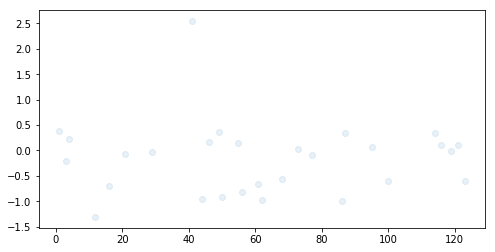

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))
residuals = y_test - y_pred
ax.scatter(x=X_test.index, y=residuals, alpha=.1);

In [22]:
print(lr.intercept_)
print(list(zip(food.columns, lr.coef_)))

0.5398005097797374
[('diet_current_coded', 0.08339317899110577), ('exercise', 0.004820481518272092), ('weight', 0.03203790495518128), ('ideal_diet_coded', 0.00613961944748332), ('fav_food', 0.014501319192259464), ('ethnic_food', 0.07019447579438998), ('on_off_campus', 0.018474955895071556)]


In [23]:
compare_to_actual = list(zip(lr.predict(X_test), y_test))
compare_to_actual

[(1.6046143244649278, 1),
 (1.98058062348838, 2),
 (2.0034092407665396, 2),
 (1.6572973516657359, 1),
 (2.0325129543634004, 2),
 (1.656407561680024, 2),
 (1.4505795137350206, 4),
 (1.9413831082452313, 2),
 (2.0612302389468775, 2),
 (1.8472286737687147, 2),
 (1.7042939227136578, 1),
 (1.7682545539538526, 2),
 (2.003186315495717, 1),
 (2.2152369799371048, 2),
 (1.6527965857548725, 2),
 (1.8237887549566685, 1),
 (2.0842983194596103, 2),
 (1.8294316155135495, 2),
 (1.9006370656827913, 2),
 (1.8912510304356267, 2),
 (1.619296366874544, 2),
 (1.910246769317565, 1),
 (1.6320479141268485, 2),
 (2.315143507018232, 1),
 (1.6022770518850937, 1),
 (1.9835718318157154, 1),
 (1.9598758721412146, 1),
 (1.5710915516918231, 1)]

On first pass, the model seems to be underfitting.

## For each variable individually (including categorical variables):
 Look at the descriptive statistics.
 
 Visualize the distribution.
 
 Note which variables appear to be roughly normally distributed and which appear to be strongly skewed, as well as any other potentially important observations.  


In [24]:
food_counts = food.describe()
food_counts

,diet_current_coded,exercise,weight,ideal_diet_coded,fav_food,ethnic_food,on_off_campus,fav_cuisine_coded
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,1.715596,1.577982,159.688073,3.669725,1.669725,3.678899,1.293578,2.467890
std,0.721261,0.670732,29.807312,2.072997,0.892925,1.200931,0.642662,1.988713
min,1.000000,1.000000,110.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,135.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,2.000000,1.000000,155.000000,3.000000,1.000000,4.000000,1.000000,1.000000
75%,2.000000,2.000000,180.000000,5.000000,3.000000,5.000000,1.000000,4.000000
max,4.000000,3.000000,264.000000,8.000000,3.000000,5.000000,4.000000,8.000000


In [25]:
food2 = food.drop('weight', axis=1)

food2.describe() #weight has such higher numbers than everything else, it's making it hard to view anything else. I might code it later to categories.

,diet_current_coded,exercise,ideal_diet_coded,fav_food,ethnic_food,on_off_campus,fav_cuisine_coded
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,1.715596,1.577982,3.669725,1.669725,3.678899,1.293578,2.467890
std,0.721261,0.670732,2.072997,0.892925,1.200931,0.642662,1.988713
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,2.000000,1.000000,3.000000,1.000000,4.000000,1.000000,1.000000
75%,2.000000,2.000000,5.000000,3.000000,5.000000,1.000000,4.000000
max,4.000000,3.000000,8.000000,3.000000,5.000000,4.000000,8.000000


In [26]:
food_counts = food2.describe()
food_counts = food_counts.drop('count') #this isn't a meaningful metric for this exercise

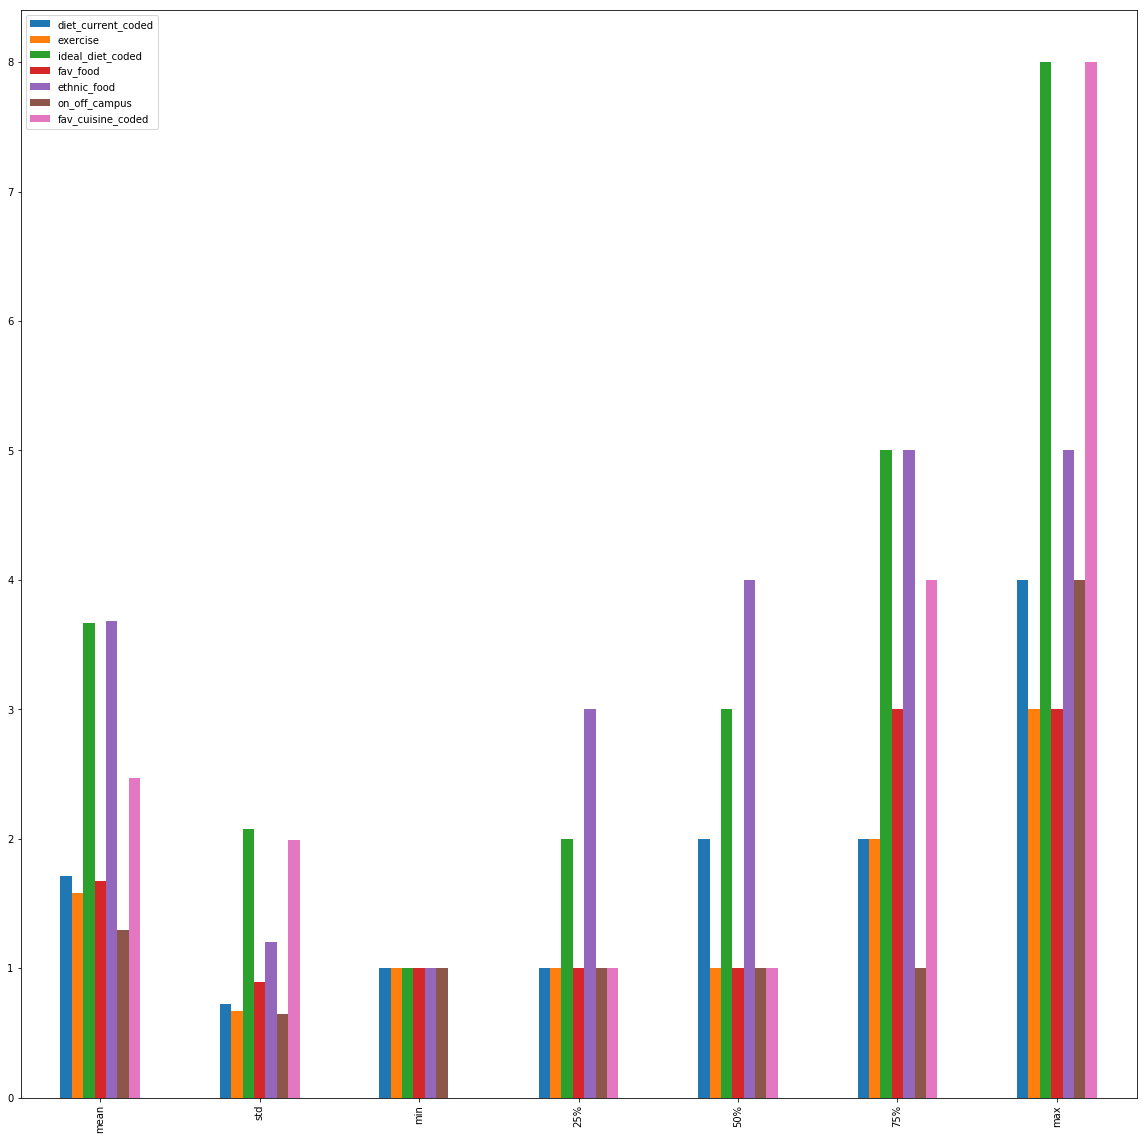

In [27]:
food_counts.plot(kind="bar",figsize=(20,20))

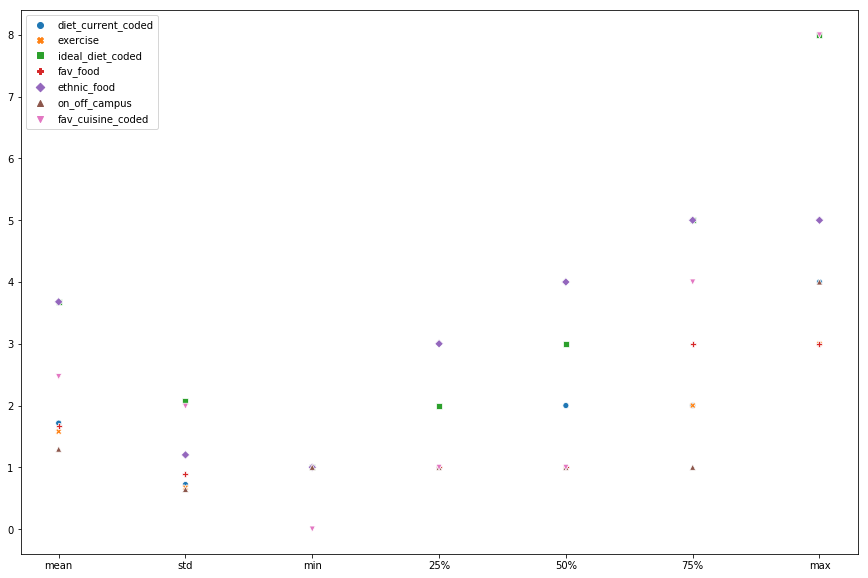

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=food_counts, ax=ax);

From looking at the descriptive statistics and the visualizations, ethnic_food seems to be somewhat skewed, fav_food a little less so. The standard deviation for everything else seems to be in the normal range.

I'm not getting a lot out of the current feature columns, so I want to take a quick look at the whole dataframe.

In [29]:
all_counts =food1.describe()
all_counts

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


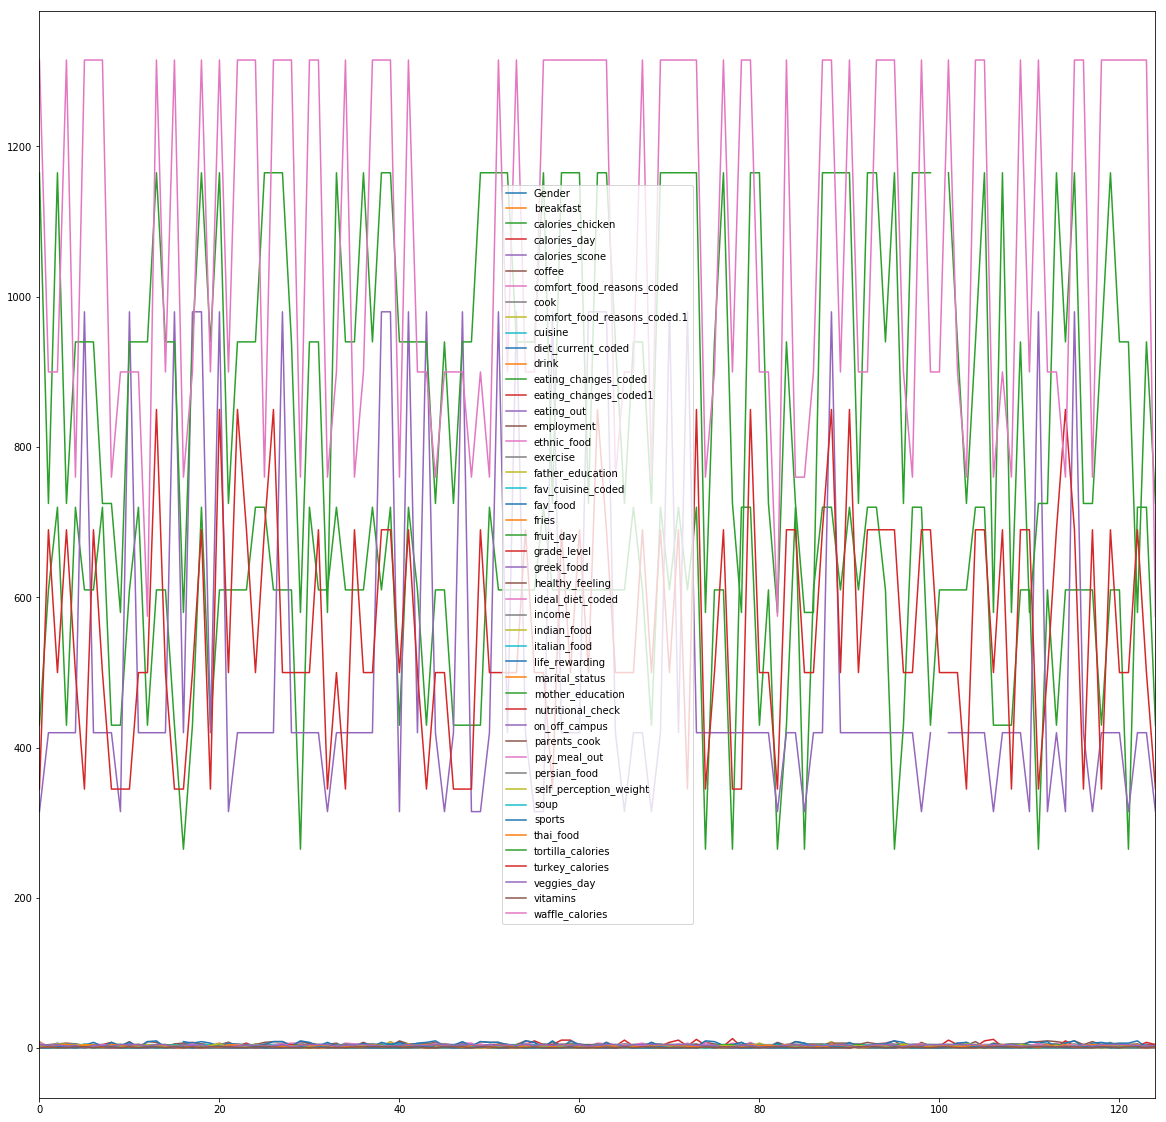

In [34]:
axes = food1.plot(figsize=(20,20))

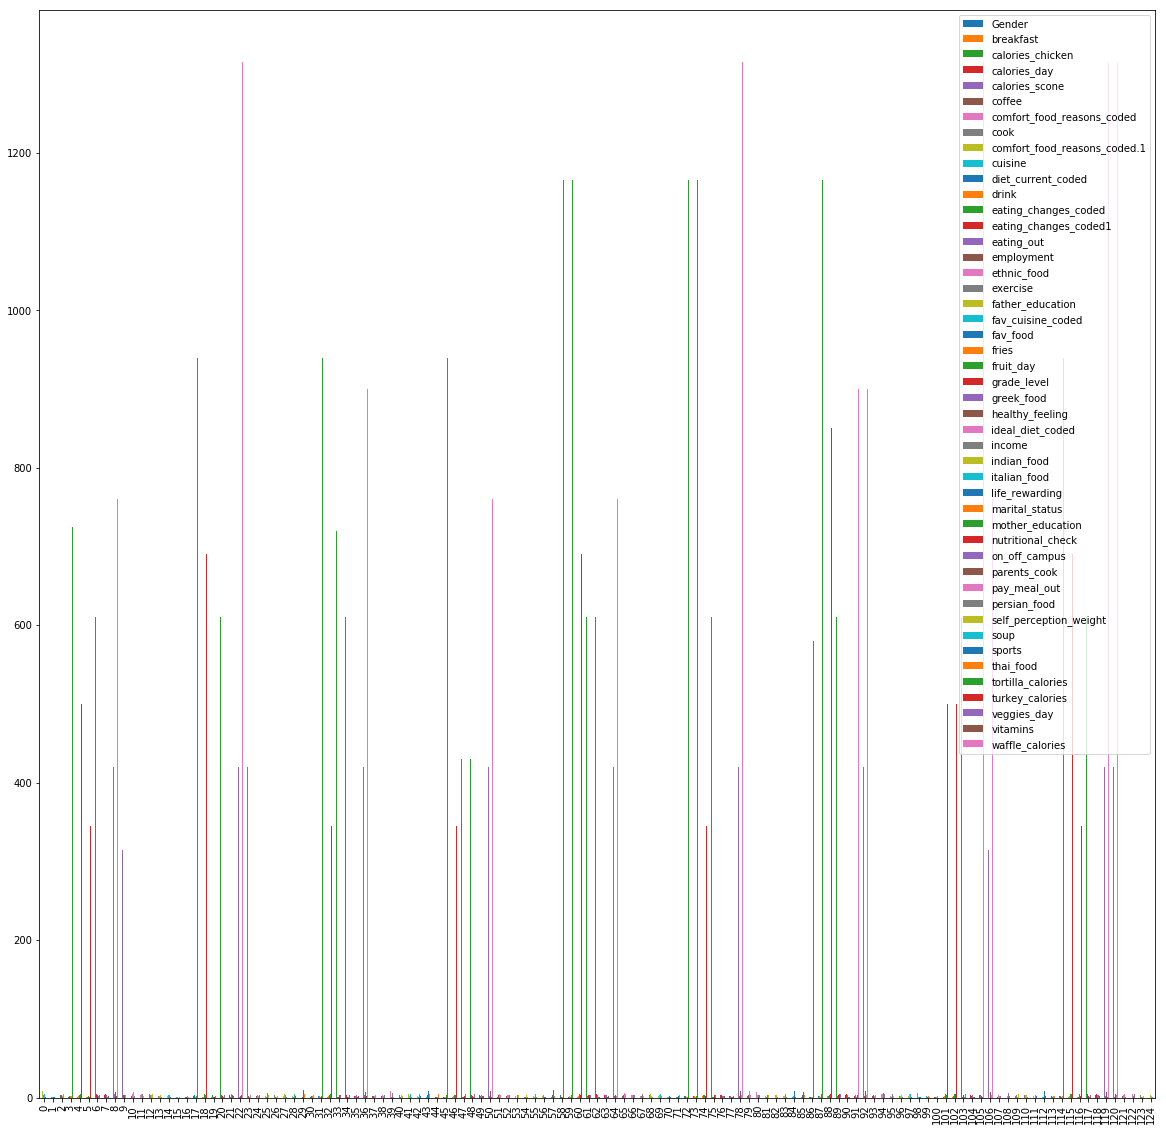

In [30]:
axes = food1.plot(kind='bar',figsize=(20,20))

## For each potential feature variable:

  Measure its correlation with the target variable.
  
  Visualize its relationship with the target variable.
  
  Note which feature variables appear to be roughly linearly related to the target, related to it but not linearly, and unrelated to it, as well as any other potentially important observations.


[('diet_current_coded', 0.0020356362063489357)]


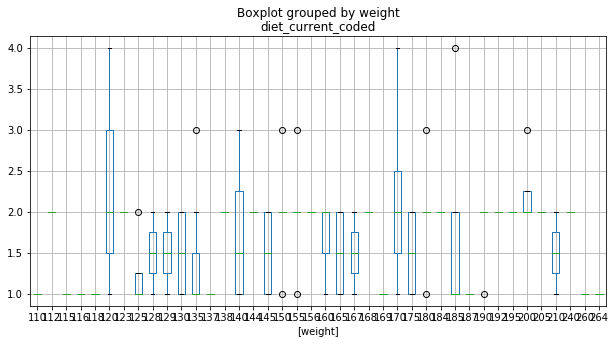

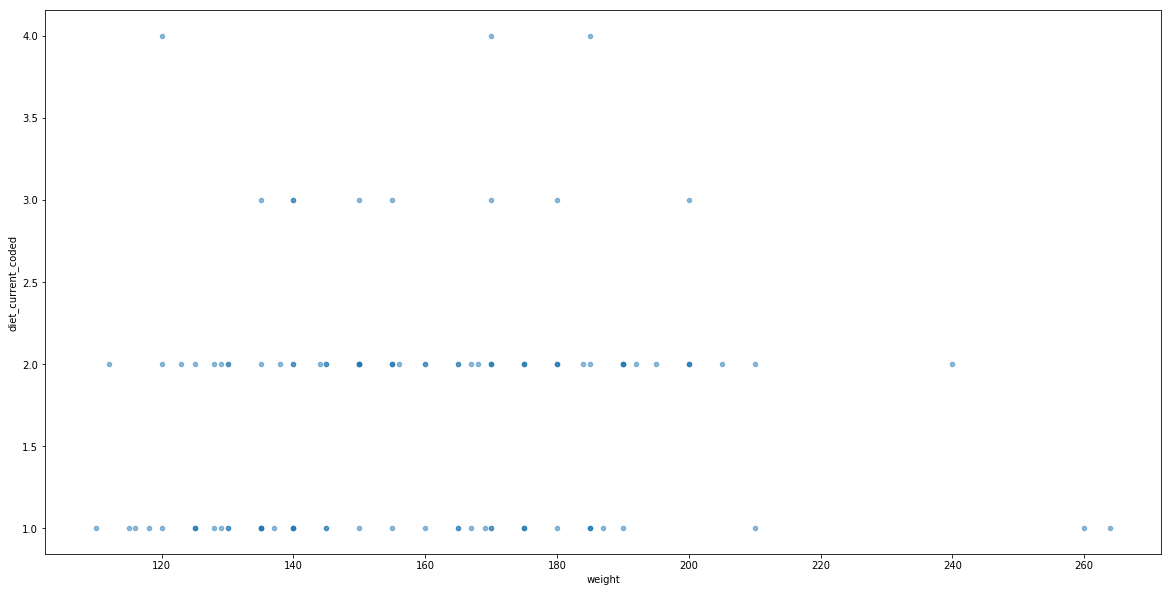

In [31]:
feature_cols =[]
feature = ''
def find_corr(feature_cols, feature):
    X = food[feature_cols]
    y = food['diet_current_coded']

    lr_feat = LinearRegression()
    lr_feat.fit(X, y)

    print(list(zip(food.columns, lr_feat.coef_)))
    ax = food.boxplot('diet_current_coded', by=feature_cols,
                     figsize=(10,5))
    axes= food.loc[:, [feature,'diet_current_coded']].plot(kind='scatter', x= feature, y='diet_current_coded', alpha=.5,figsize=(20,10))
find_corr(['weight'], 'weight')    

[('diet_current_coded', 0.01456867241242982)]


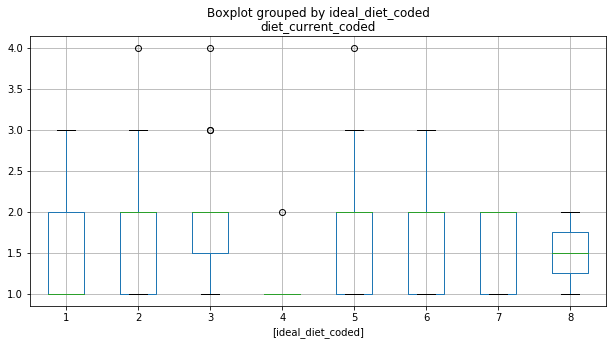

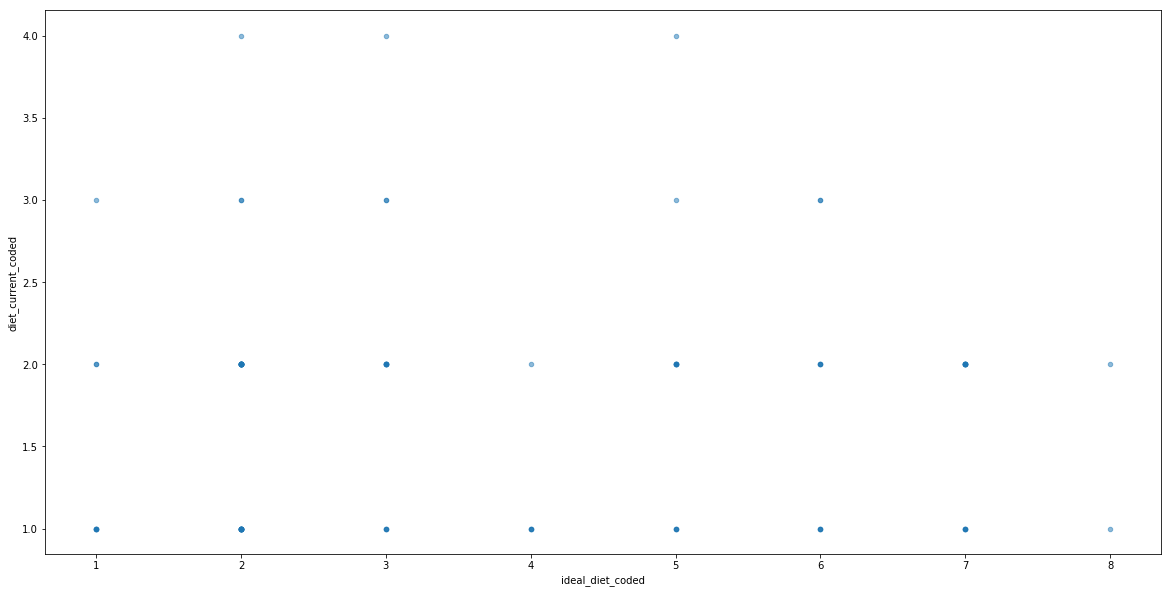

In [32]:
find_corr(['ideal_diet_coded'], 'ideal_diet_coded')

[('diet_current_coded', -0.03760920519923291)]


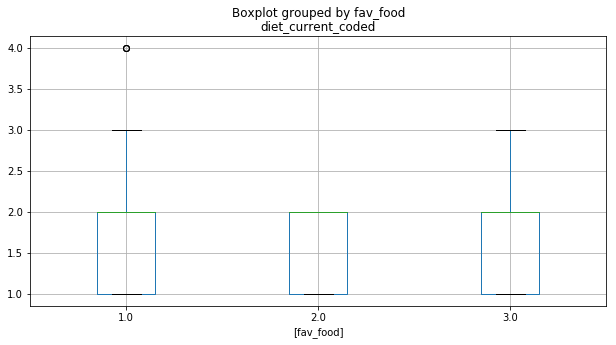

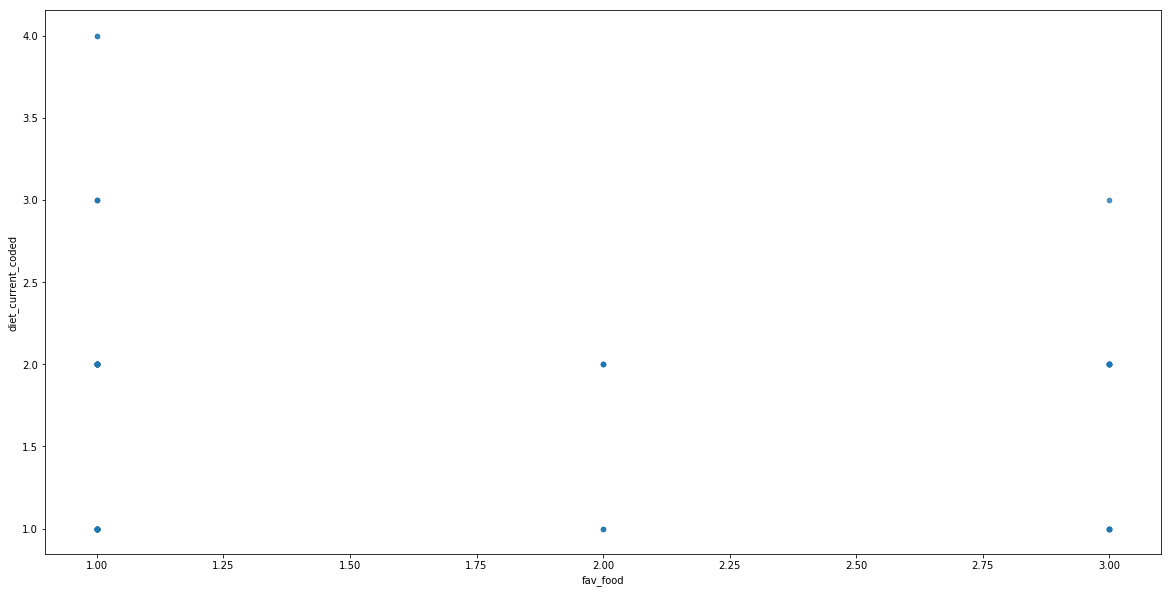

In [33]:
find_corr(['fav_food'],'fav_food')    

[('diet_current_coded', 0.006714571798798451)]


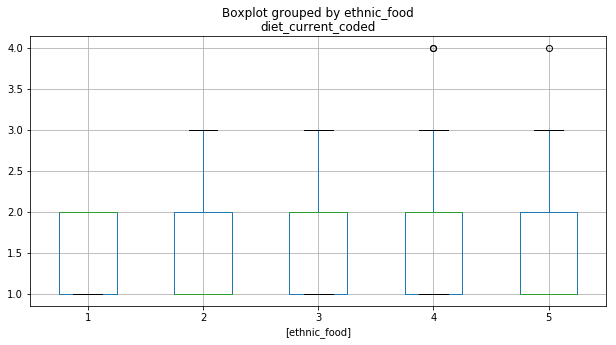

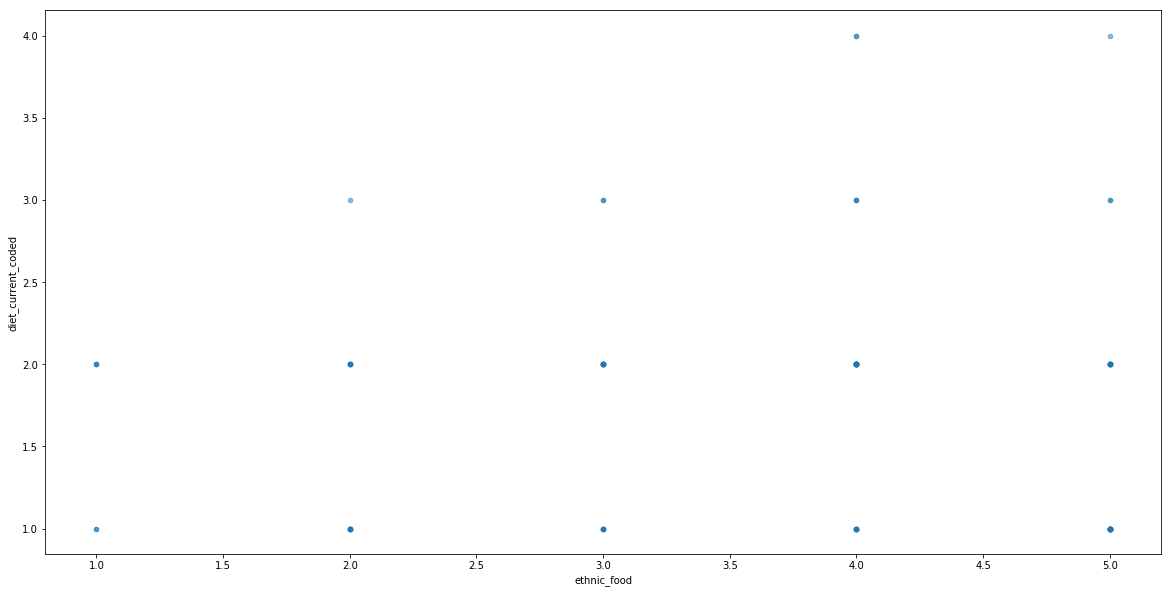

In [34]:
find_corr(['ethnic_food'],'ethnic_food')

[('diet_current_coded', -0.020156314273961355)]


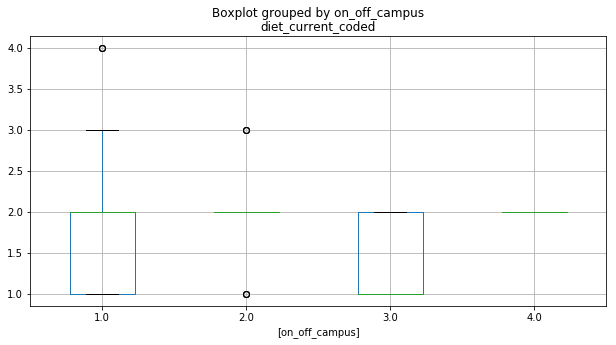

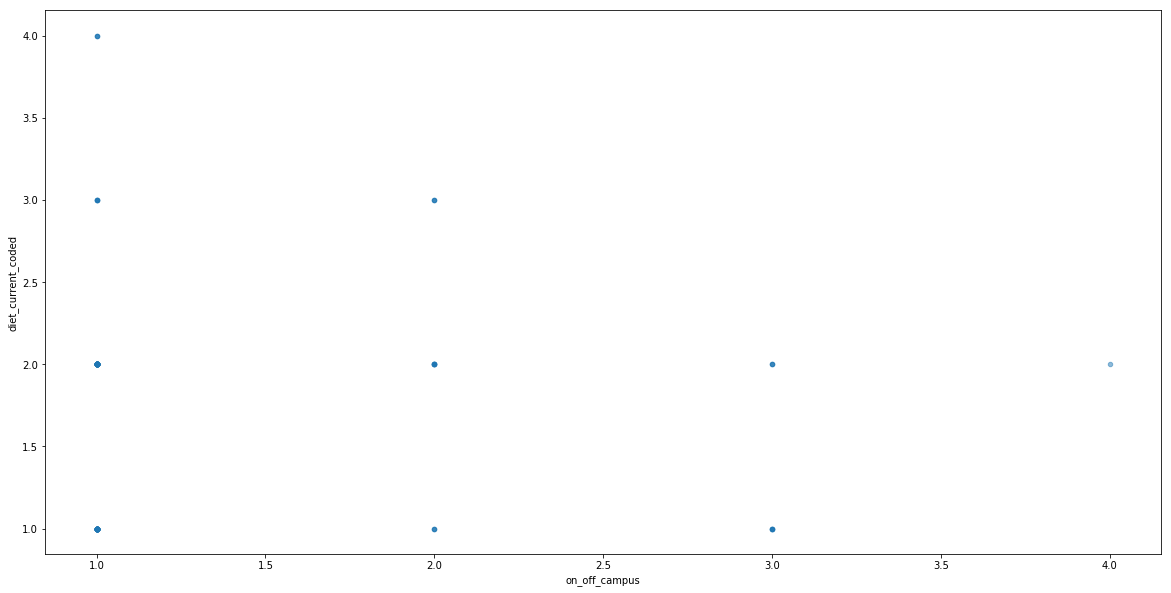

In [35]:
find_corr(['on_off_campus'], 'on_off_campus')

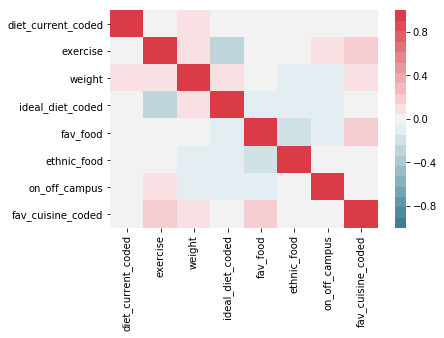

In [36]:
sns.heatmap(food.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            );

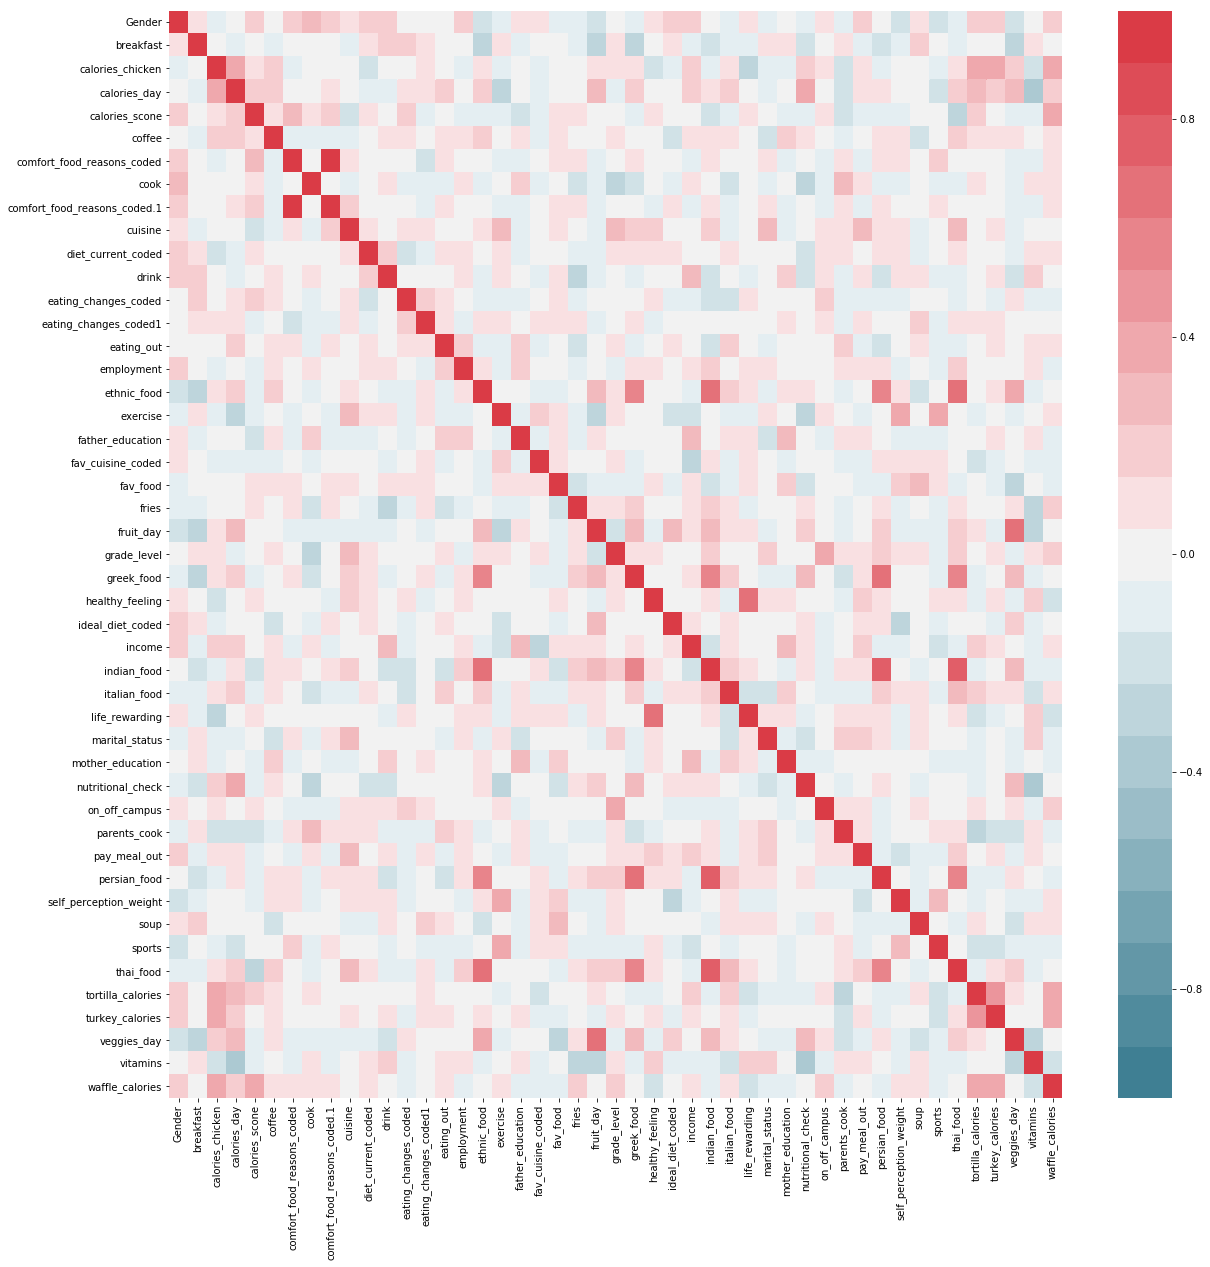

In [37]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(food1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            ax=ax,
            );

Without doing any data cleaning, nothing in this data set appears to be strongly correlated with the target variable. The only real strong correlations that are showing up are between "ethnic_foods", and other columns that would a fall under that category. Students were asked how likely they are to eat that type of food.  I'm going to need to inspect this data set in fine detail. Some columns have outliers that may be throwing off the correlation. 

This is a big limitation of that data, that there doesn't seem to be much correlation between the feature columns used so far and the target variable. There may simply not be a lot of variation in the data itself and by that I mean, maybe diet_current_coded was grouped together too liberally without enough nuance. Possibly just a wide variety of students eat very similarly.  

I will have try different feature columns.

I need to evaluate the original answers verses the coded ones. 

I will most likely need to use the non-numeric columns, but I may need to split some where the answers are lists, and I might need to figure out how to do some natural language processing. 

I may also need to change some columns to boolean.

I can also adjust the sensitivity of my model.

I may also need to create a column that gives squares of another column.

Mean Absolute Error is a better regression metric to use for this data, because a rare instance of a prediction off by a large margin is not that detrimental, but the majority of the predictions should have a small margin of error. 